In the prior chapter, we covered how different loss functions and regularization terms affected a linear model, in terms of the model's qualitative performance and its affect on the training score. However, as we saw, the training score an be a misleading performance indicator. How might we judge the model's performance more rigorously? This chapter addresses this by reviewing the why and how of performing Cross Validation, and also what this means regarding optimizing the hyperparameters of a model.


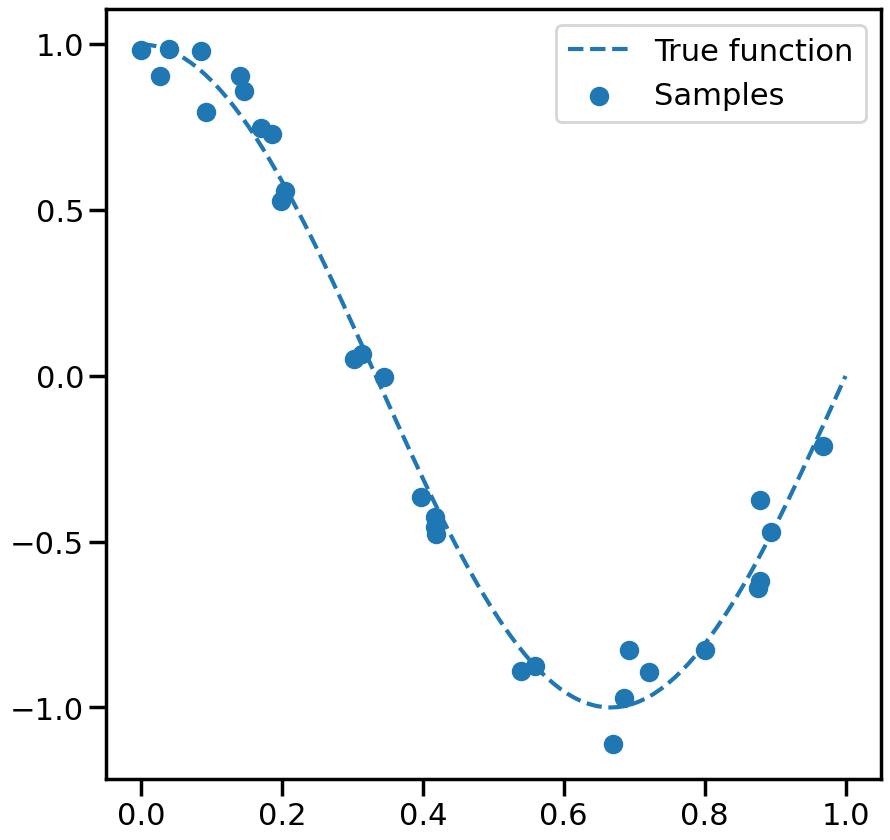

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import seaborn as sns
sns.set_context('poster')
pal = sns.color_palette("Paired")
cmap = sns.blend_palette(pal,as_cmap=True)
np.random.seed(1)

# Number of data points
n_samples = 30

# True Function we want to estimate
true_fun = lambda X: np.cos(1.5 * np.pi * X)

# Noisy Samples from the true function
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(10,10))
# Plot the true function:
X_plot = np.linspace(0, 1, 100)
plt.plot(X_plot, true_fun(X_plot), '--',label="True function")
# Plot the data samples
plt.scatter(X,y, label="Samples")
plt.legend(loc="best")
plt.show()

## Getting an Unbiased Estimate of Out-of-Sample Performance

When we train a machine learning model, we are typically interested in how well the model will perform on data it has not seen before. This is often referred to as the model's generalization performance. However, if we evaluate the model's performance on the same data it was trained on, we may get an overly optimistic estimate of its true performance. This is because the model may have simply memorized the training data, rather than learning the underlying patterns. One popular way to assess this is through [Cross Validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)):

In [2]:
#| code-fold: false
# Now let's split the data into training and test data:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=0)

Let's take a look at what the above has actually done.

X_train
 [8.78142503e-01 3.02332573e-01 4.19194514e-01 6.92322616e-01
 1.40386939e-01 4.17304802e-01 1.86260211e-01 3.96767474e-01
 7.20324493e-01 6.70467510e-01 2.73875932e-02 9.68261576e-01
 1.46755891e-01 9.23385948e-02 5.38816734e-01 5.58689828e-01
 1.98101489e-01 1.69830420e-01 8.76389152e-01 8.50442114e-02
 1.14374817e-04 6.85219500e-01 4.17022005e-01 3.13424178e-01] 

X_test
 [0.03905478 0.89460666 0.34556073 0.20445225 0.87811744 0.80074457] 

y_train
 [-0.37395132  0.05199163 -0.47818202 -0.82672018  0.90350849 -0.45417721
  0.72898424 -0.36366041 -0.89399733 -1.11157064  0.90389734 -0.21270638
  0.86040424  0.79675107 -0.89105816 -0.87458209  0.52662674  0.74673588
 -0.63887828  0.97904574  0.98275703 -0.97273902 -0.42390528  0.0668933 ] 

y_test
 [ 0.98733352 -0.47140604 -0.00455281  0.55839434 -0.61801179 -0.82613321] 



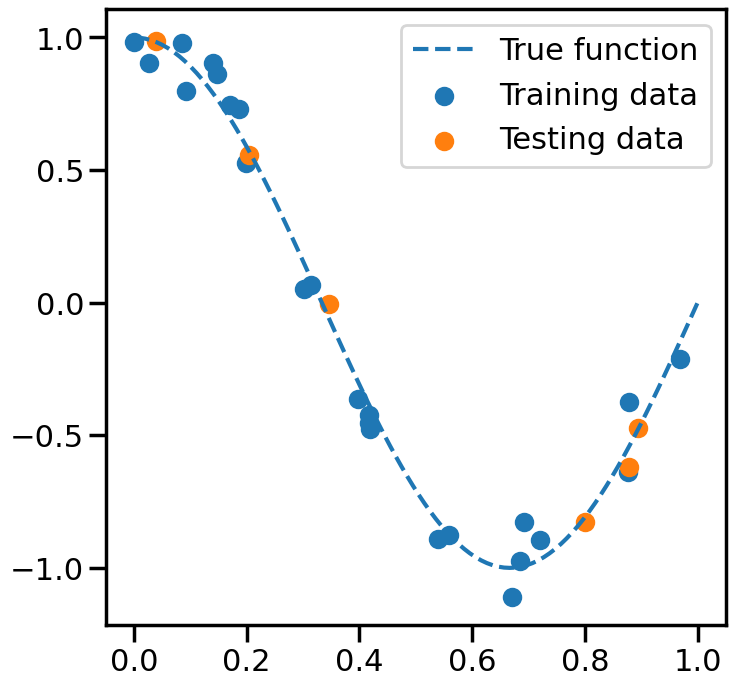

In [3]:
print('X_train\n',X_train,'\n')
print('X_test\n',X_test,'\n')
print('y_train\n',y_train,'\n')
print('y_test\n',y_test,'\n')

plt.figure(figsize=(8,8))
plt.plot(X_plot, true_fun(X_plot), '--',label="True function")
# plot the training and testing points in colors
plt.scatter(X_train,y_train, label="Training data")
plt.scatter(X_test,y_test, label="Testing data")
plt.legend(loc="best")
plt.show()

The key idea in cross validation is to test the model on data that was separate from the data you trained on, therefore establishing two datasets: a training set and a test set. The training set is used to fit the model, while the test set is used to evaluate its performance. This way, we can get a more realistic estimate of how well the model will perform on new, unseen data.

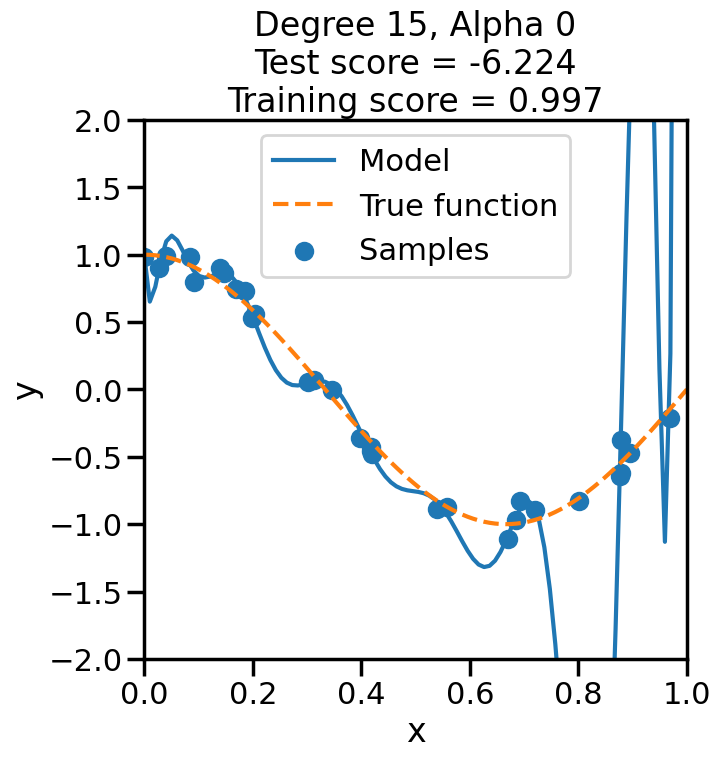

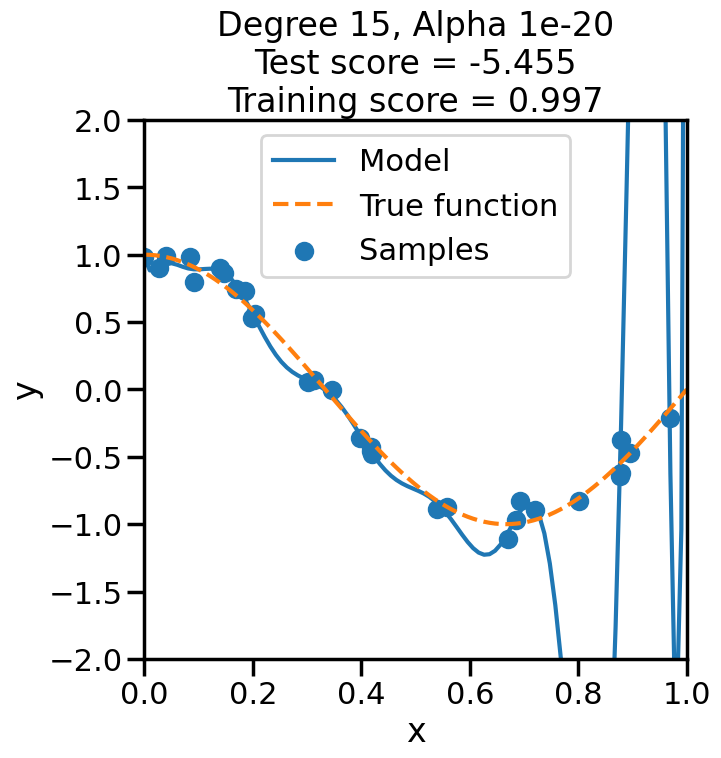

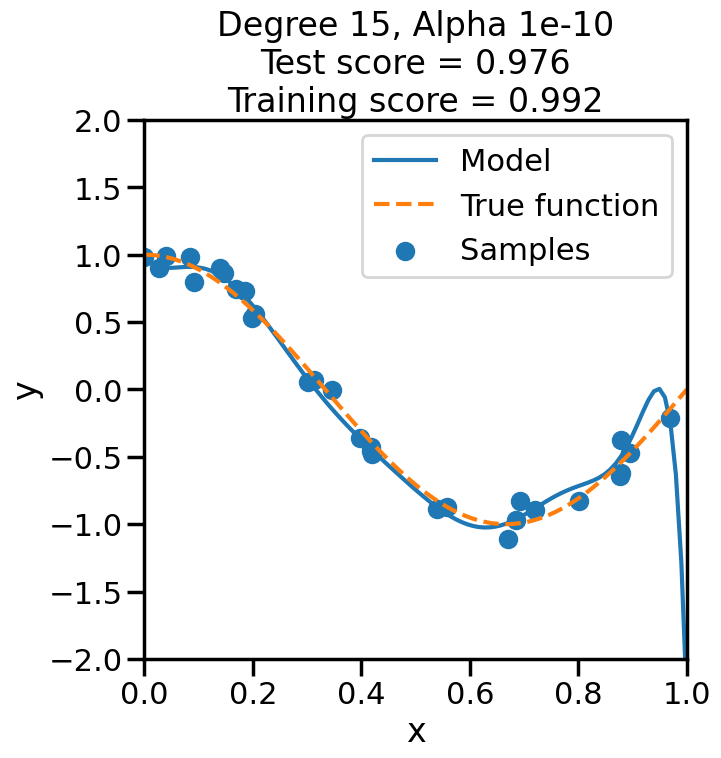

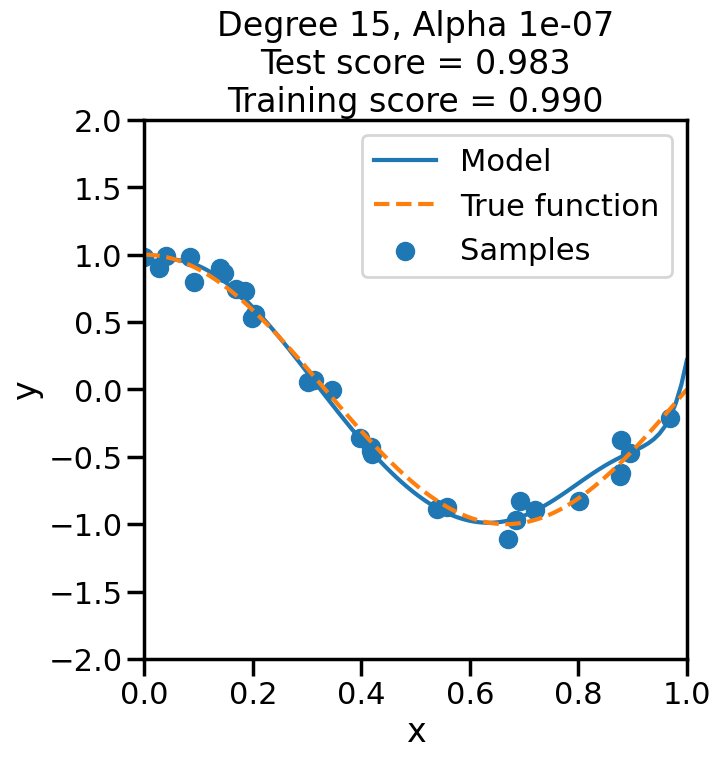

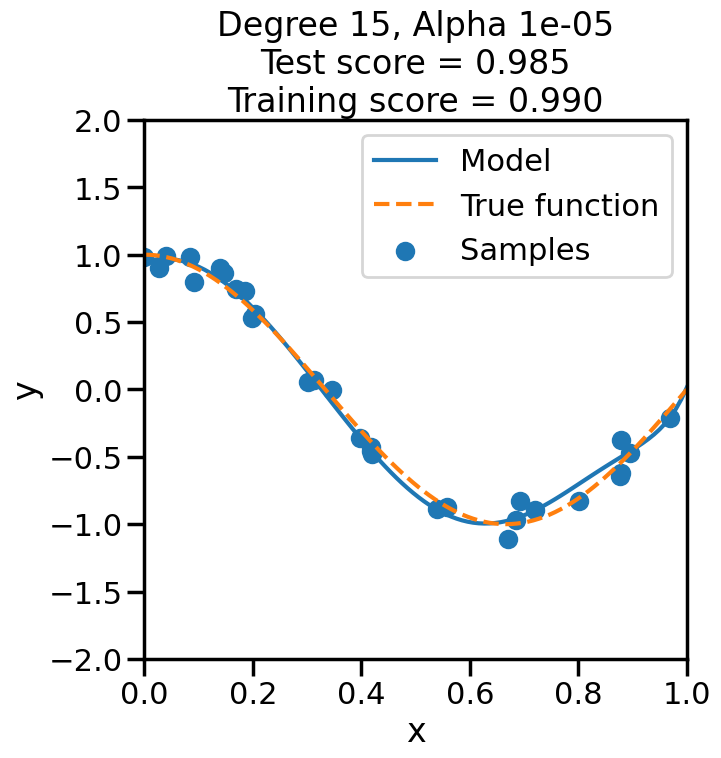

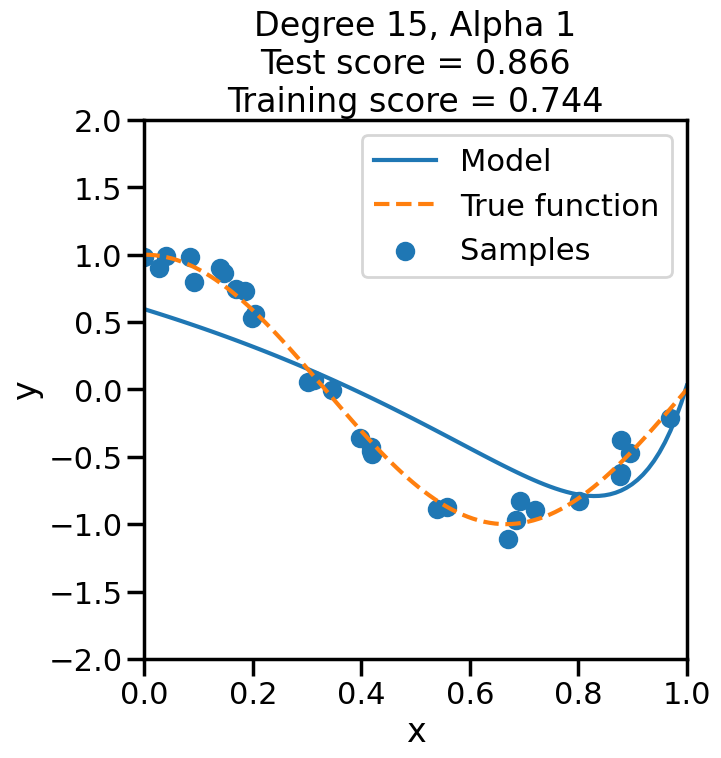

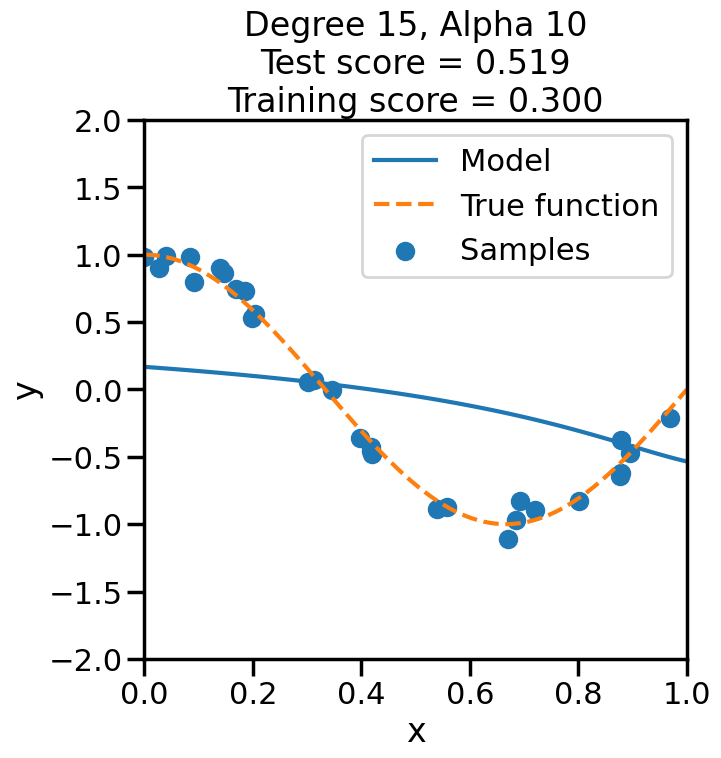

In [ ]:
alphas = [0, 1e-20, 1e-10, 1e-7, 1e-5, 1,10]
d=15
for a in alphas:
    plt.figure(figsize=(7, 7))
    #plt.setp(ax, xticks=(), yticks=())
    polynomial_features = PolynomialFeatures(degree=d,
                                             include_bias=False)
    linear_regression = LinearRegression()
    linear_regression = Ridge(alpha=a)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    #pipeline.fit(X[:, np.newaxis], y)
    pipeline.fit(X_train[:, np.newaxis], y_train)
    # Evaluate the models using crossvalidation
    #scores = cross_validation.cross_val_score(pipeline,
    #    X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
    testing_score = pipeline.score(X_test[:, np.newaxis],y_test)
    training_score = pipeline.score(X_train[:, np.newaxis],y_train)

    X_plot = np.linspace(0, 1, 100)
    plt.plot(X_plot, pipeline.predict(X_plot[:, np.newaxis]), label="Model")
    plt.plot(X_plot, true_fun(X_plot), '--',label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    
    plt.title("Degree {}, Alpha {}\nTest score = {:.3f}\nTraining score = {:.3f}".format(
        d, a, testing_score,training_score))
    plt.show()

This is a simplified type of cross-validation often referred to as "Shuffle Splitting" and is one of the most common, but it is useful to review other types of cross-validation via [this nice summary page from the SKLearn library](https://scikit-learn.org/stable/modules/cross_validation.html), which covers a variety of important variants including:

1. K-Fold Cross Validation
2. Leave-One-Out Cross Validation
3. Stratified Cross Validation
4. Group-wise Cross Validation
5. Time Series Split Cross Validation

**Discussion Point**: Under what conditions or situations would using each type of cross-validation above be appropriate versus inappropriate?

## Finding the Optimal Hyper-parameters

Now that we have introduced the usage of hyper-parameters and cross-validation, a natural question arises: How do we choose the hyper-parameters? There are many ways to do this, and this section will describe the most common and basic ones, while leaving more advanced techniques (like Implicit Differentiation) for later. Specifically, this section will:
1. Define the concepts of Grid and Random Hyper-parameter search.
2. Use Grid and Random search to optimize hyper-parameters of a model.
2. Distinguish when Randomized Search is much better than grid search.
3. Describe how Global Optimization procedures such as Bayesian Optimization work.
4. Recognize why none of those at all work in High Dimensions and describe the "Curse of Dimensionality"

In future chapters once we cover more advanced derivative methods, we can discuss how to use tools like Implicit Differentiation to directly compute the gradient of the cross-validation score with respect to hyper-parameters, and then use this gradient to optimize the hyper-parameters using standard gradient-based optimization methods. However, for now, let's focus on more basic derivative-free methods, since they are more widely used and easier to understand.

Let's start by returning to our Polynomial example, and this time focus on finding the best combination of degree and penalty weight for a linear model.

In [5]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error

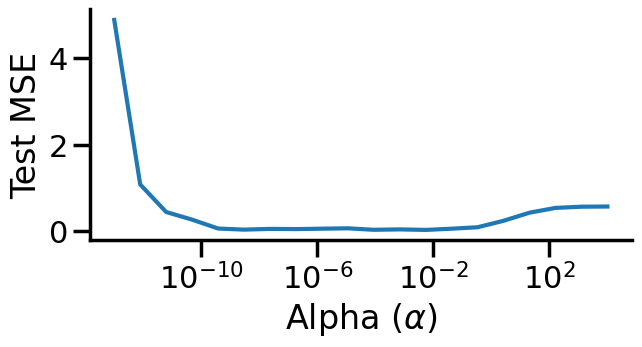

In [7]:
from sklearn import model_selection

# Let's plot the behavior of a fixed degree polynomial
degree = 15
# (i.e., f(x) = w_1*x + w_2*x^2 + ... + w_15*x^15)
# but where we change alpha.
alphas = np.logspace(start=-13,stop=4,num=20)
polynomial_features = PolynomialFeatures(degree=degree,
                                         include_bias=False)
scores = []
for a in alphas:
    linear_regression = Ridge(alpha=a)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    cv_scores = model_selection.cross_val_score(pipeline,
        X[:,np.newaxis], y, scoring="neg_mean_squared_error", cv=20)
    scores.append(cv_scores)

scores = np.array(scores)

plt.figure(figsize=(7,3))
plt.semilogx(alphas,-np.mean(scores,axis=1),'-')
plt.ylabel('Test MSE')
plt.xlabel('Alpha ($\\alpha$)')
sns.despine()
plt.show()

## What if we have more than one variable?
Let's look at both polynomial degree and regularization weight

In [8]:
scores = []
alphas = np.logspace(start=-13, # Start at 1e-13
                     stop=4,    # Stop at 1e4
                     num=40)    # Split that into 40 pieces
degrees = range(1,16) # This will only go to 15, due to how range works

scores = np.zeros(shape=(len(degrees), # i.e., 15
                         len(alphas))) # i.e., 20

for i, degree in enumerate(degrees): # For each degree
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    
    for j,a in enumerate(alphas):    # For each alpha
        linear_regression = Ridge(alpha=a)
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])
        cv_scores = model_selection.cross_val_score(pipeline,
            X[:,np.newaxis], y, scoring="neg_mean_squared_error", cv=20)
        scores[i][j] = -np.mean(cv_scores)


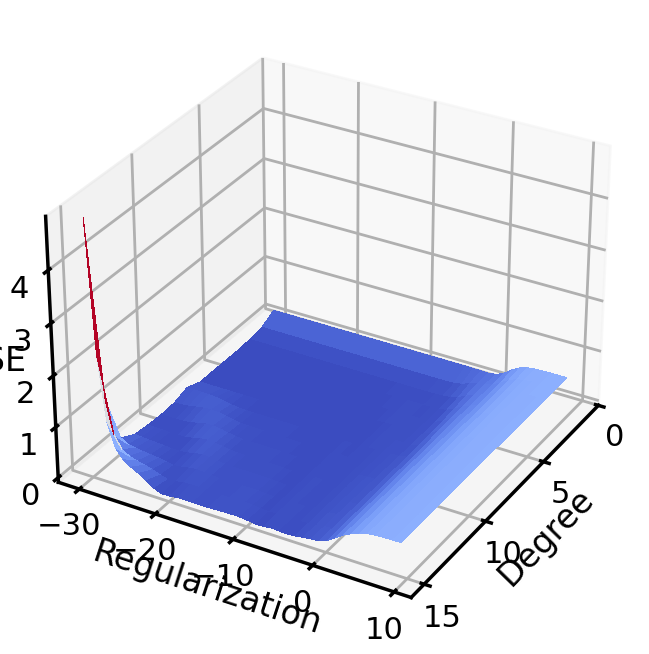

In [9]:
fig = plt.figure(figsize=(10,7))
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
ax = fig.add_subplot(111, projection='3d')

Xs, Ys = np.meshgrid(range(len(degrees)), range(len(alphas)))
zs = np.array([scores[i,j] for i,j in zip(np.ravel(Xs), np.ravel(Ys))])
Zs = zs.reshape(Xs.shape)

Xs, Ys = np.meshgrid(degrees, np.log(alphas))

ax.plot_surface(Xs, Ys, Zs, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)

# Label the Axes
ax.set_xlabel('Degree')
ax.set_ylabel('Regularization')
ax.set_zlabel('MSE')

# Rotate the image
ax.view_init(30, # larger # goes "higher"
             30) # larger # "circles around"
plt.tight_layout()
plt.show()

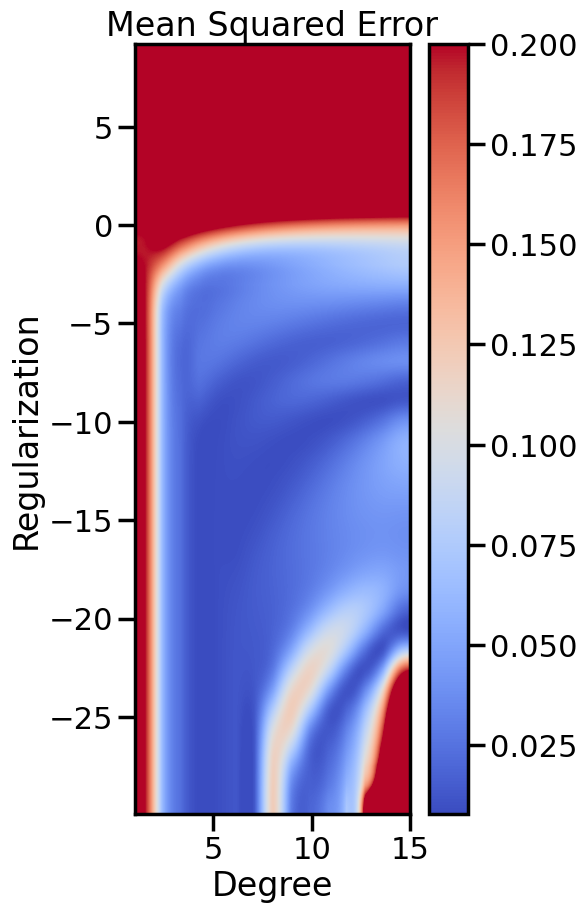

In [10]:
plt.figure(figsize=(5,10))
plt.imshow(Zs,
           cmap=cm.coolwarm, # Allows you to set the color
           vmin=Zs.min(), vmax=0.2, # The min and max Z-Values (for coloring purposes)
           extent=[Xs.min(), Xs.max(),   # How far on X-Axis you want to plot
                   Ys.min(), Ys.max()],  # How far on Y-Axis
           interpolation='spline16',      # How do you want to interpolate values between data?
           origin='lower')
plt.title('Mean Squared Error')
plt.xlabel('Degree')
plt.ylabel('Regularization')
plt.colorbar()

## Optimization
At the end of the day, all this is doing is optimization/search over different parameters.

How should we go about automating this?

Most common: Grid Search.

In [11]:
print('parameters we could change:')
for k in pipeline.get_params().keys():
    print(" ",k)

parameters we could change:
  memory
  steps
  transform_input
  verbose
  polynomial_features
  linear_regression
  polynomial_features__degree
  polynomial_features__include_bias
  polynomial_features__interaction_only
  polynomial_features__order
  linear_regression__alpha
  linear_regression__copy_X
  linear_regression__fit_intercept
  linear_regression__max_iter
  linear_regression__positive
  linear_regression__random_state
  linear_regression__solver
  linear_regression__tol


In [15]:
from sklearn.model_selection import GridSearchCV
parameters = {'polynomial_features__degree': list(range(1,16)), # 15 possible
              'linear_regression__alpha': np.logspace(start=-13,stop=4,num=10),
              'polynomial_features__include_bias':[True, False]}

In [16]:
# How do we want to do cross-validation?
from sklearn import model_selection
num_data_points = len(y)

# 4-fold CV
kfold_cv = model_selection.KFold(n_splits = 4) 

# Or maybe you want randomized splits?
shuffle_cv = model_selection.ShuffleSplit(n_splits = 20,     # How many iterations?
                                          test_size=0.2    # What % should we keep for test?
                                         )

In [18]:
X=X[:,np.newaxis]
grid_search = GridSearchCV(pipeline,    # The thing we want to optimize
                           parameters,  # The parameters we will change
                           cv=shuffle_cv, # How do you want to cross-validate?
                           scoring = 'neg_mean_squared_error'
                          )
grid_search.fit(X, y) # This runs the cross-validation

GridSearchCV(cv=ShuffleSplit(n_splits=20, random_state=None, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures(degree=15,
                                                           include_bias=False)),
                                       ('linear_regression',
                                        Ridge(alpha=np.float64(10000.0)))]),
             param_grid={'linear_regression__alpha': array([1.00000000e-13, 7.74263683e-12, 5.99484250e-10, 4.64158883e-08,
       3.59381366e-06, 2.78255940e-04, 2.15443469e-02, 1.66810054e+00,
       1.29154967e+02, 1.00000000e+04]),
                         'polynomial_features__degree': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15],
                         'polynomial_features__include_bias': [True, False]},
             scoring='neg_mean_squared_error')

In [19]:
grid_search.best_params_ # Once finished, you can see what the best parameters are

{'linear_regression__alpha': np.float64(3.5938136638046257e-06),
 'polynomial_features__degree': 4,
 'polynomial_features__include_bias': True}

In [20]:
print("Best MSE for Grid Search: {:.2e}".format(-grid_search.best_score_))

Best MSE for Grid Search: 6.93e-03


In [21]:
grid_search.predict(X)  # You can also use the best model directly (in sklearn)

array([ 0.92597995,  0.97112185,  0.97915236,  0.95343228,  0.94185444,
        0.8235348 ,  0.80306679,  0.72117767,  0.65636685,  0.60679754,
        0.57933728,  0.10937232,  0.05389104, -0.10522154, -0.34633312,
       -0.43501599, -0.43622117, -0.44424987, -0.84518448, -0.88774347,
       -0.98056731, -0.97399224, -0.96929348, -0.94126767, -0.78277808,
       -0.54827761, -0.54221084, -0.54212267, -0.48316009, -0.20435414])

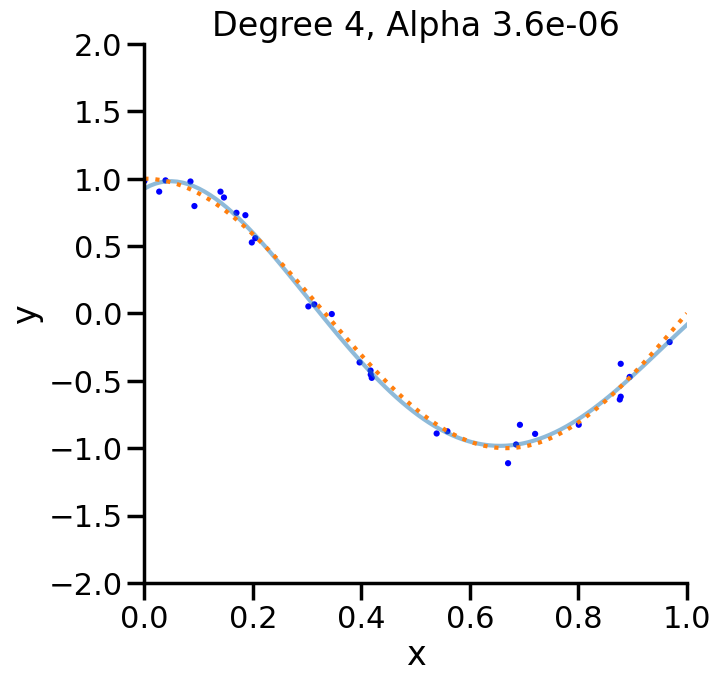

In [23]:
best_degree = grid_search.best_params_['polynomial_features__degree']
best_alpha = grid_search.best_params_['linear_regression__alpha']
X_plot = X_plot[:,np.newaxis]
plt.figure(figsize=(7, 7))
plt.plot(X_plot, grid_search.predict(X_plot),'-',label="Model",alpha=0.5)
plt.plot(X_plot, true_fun(X_plot), ':',label="True function",alpha=1)
plt.scatter(X,y, c='Blue', s=20, edgecolors='none')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
sns.despine()
plt.title("Degree {}, Alpha {:.1e}".format(best_degree,best_alpha))
plt.show()

## Randomized Search

In reality, grid search is wasteful and not easy to control. A better (and still easy way) is to randomize the search.

In [24]:
# Now, instead of specifying exact which points to test, we instead
# have to specify a distribution to sample from.
# For example, things from http://docs.scipy.org/doc/scipy/reference/stats.html
from scipy.stats import randint as sp_randint
from scipy.stats import lognorm as sp_lognorm

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
parameters = {'polynomial_features__degree': sp_randint(1,20), # We want an integer
              'linear_regression__alpha': sp_lognorm(1),
              'polynomial_features__include_bias':[True, False]} # Selecting from two is fine

Need something whose logarithmic distribution we can control. How about a lognormal?
$$
\mathcal{N}(\ln x;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left[-\frac {(\ln x - \mu)^2} {2\sigma^2}\right].
$$

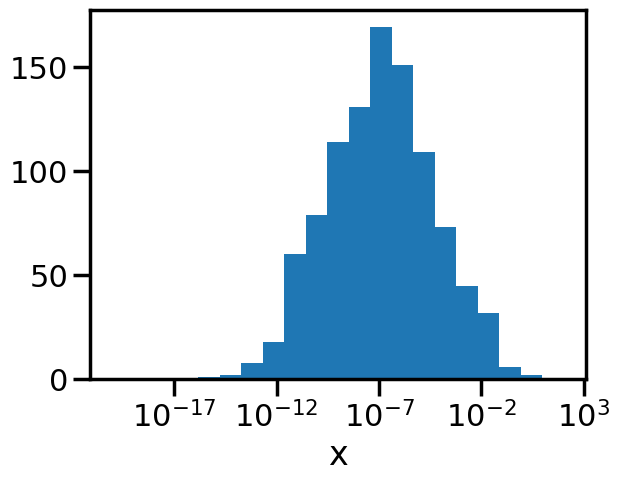

In [25]:
sigma=6
rv = sp_lognorm(sigma,scale=1e-7)

plt.figure()
plt.hist(rv.rvs(size=1000),bins=np.logspace(-20, 2, 22))
plt.xscale('log')
plt.xlabel('x')
plt.show()

In [29]:
parameters = {'polynomial_features__degree': sp_randint(1,20), # We want an integer
              'linear_regression__alpha': sp_lognorm(sigma,scale=1e-7),
              'polynomial_features__include_bias':[True, False]} # Selecting from two is fine

In [30]:
# Fitting the high degree polynomial makes the linear system almost
# singular, which makes Numpy issue a Runtime warning.
# This is not a problem here, except that it pops up the warning box
# So I will disable it just for pedagogical purposes
import warnings
warnings.simplefilter('ignore',RuntimeWarning)

# specify parameters and distributions to sample from
from sklearn.model_selection import RandomizedSearchCV

# run randomized search
#n_iter_search = 300 # How many random parameter settings should we try?
n_iter_search = len(grid_search.cv_results_['params']) # Give it same # as grid search, to be fair
random_search = RandomizedSearchCV(pipeline,
                                   param_distributions=parameters,
                                   n_iter=n_iter_search, 
                                   cv=shuffle_cv, # How do you want to cross-validate?
                                   scoring = 'neg_mean_squared_error')
random_search.fit(X, y)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=20, random_state=None, test_size=0.2, train_size=None),
                   estimator=Pipeline(steps=[('polynomial_features',
                                              PolynomialFeatures(degree=15,
                                                                 include_bias=False)),
                                             ('linear_regression',
                                              Ridge(alpha=np.float64(10000.0)))]),
                   n_iter=300,
                   param_distributions={'linear_regression__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000023215096120>,
                                        'polynomial_features__degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002320FEBFF80>,
                                        'polynomial_features__include_bias': [True,
                                                                              False]},
                   scoring='neg_mean_squared_error')

In [31]:
random_search.best_params_ # Once finished, you can see what the best parameters are

{'linear_regression__alpha': np.float64(3.3921813538938043e-06),
 'polynomial_features__degree': 4,
 'polynomial_features__include_bias': True}

In [32]:
print("Best MSE for Random Search: {:.2e}".format(-random_search.best_score_))

Best MSE for Random Search: 7.48e-03


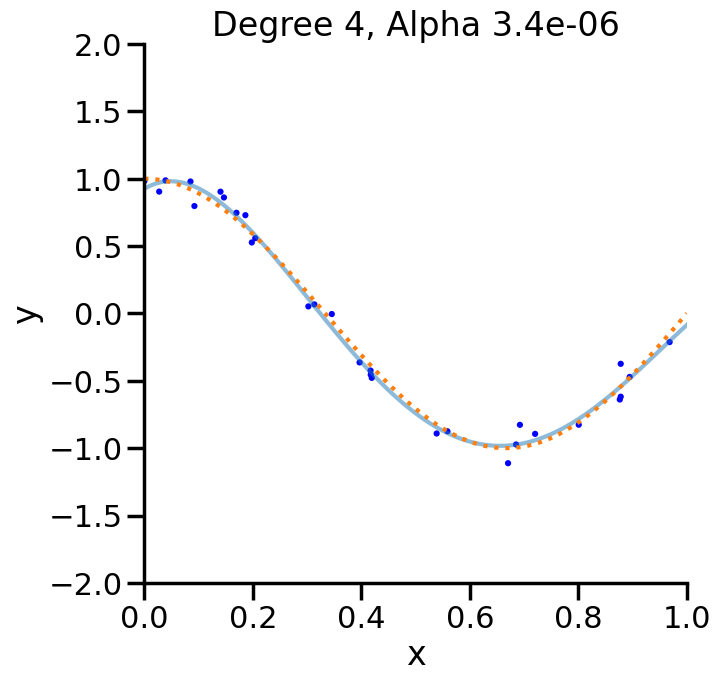

In [33]:
best_degree = random_search.best_params_['polynomial_features__degree']
best_alpha = random_search.best_params_['linear_regression__alpha']

plt.figure(figsize=(7, 7))
plt.plot(X_plot, random_search.predict(X_plot),'-',label="Model",alpha=0.5)
plt.plot(X_plot, true_fun(X_plot), ':',label="True function",alpha=1)
plt.scatter(X,y, c='Blue', s=20, edgecolors='none')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
sns.despine()
plt.title("Degree {}, Alpha {:.1e}".format(best_degree,best_alpha))
plt.show()

## Global Bayesian Optimization

Surely, since we are essentially doing optimization, we could approach hyper-parameter selection as an optimization problem as well, right?

Enter techniques like Global Bayesian Optimization below:

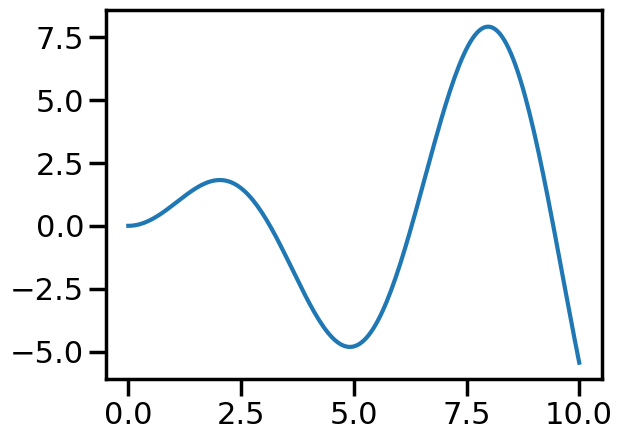

In [34]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)
    # Try others!
    #return 5 * np.sinc(x)
    #return x
    
X = np.atleast_2d(np.linspace(0, 10, 200)).T

# Observations
y = f(X).ravel()

plt.figure()
plt.plot(X,y)
plt.show()

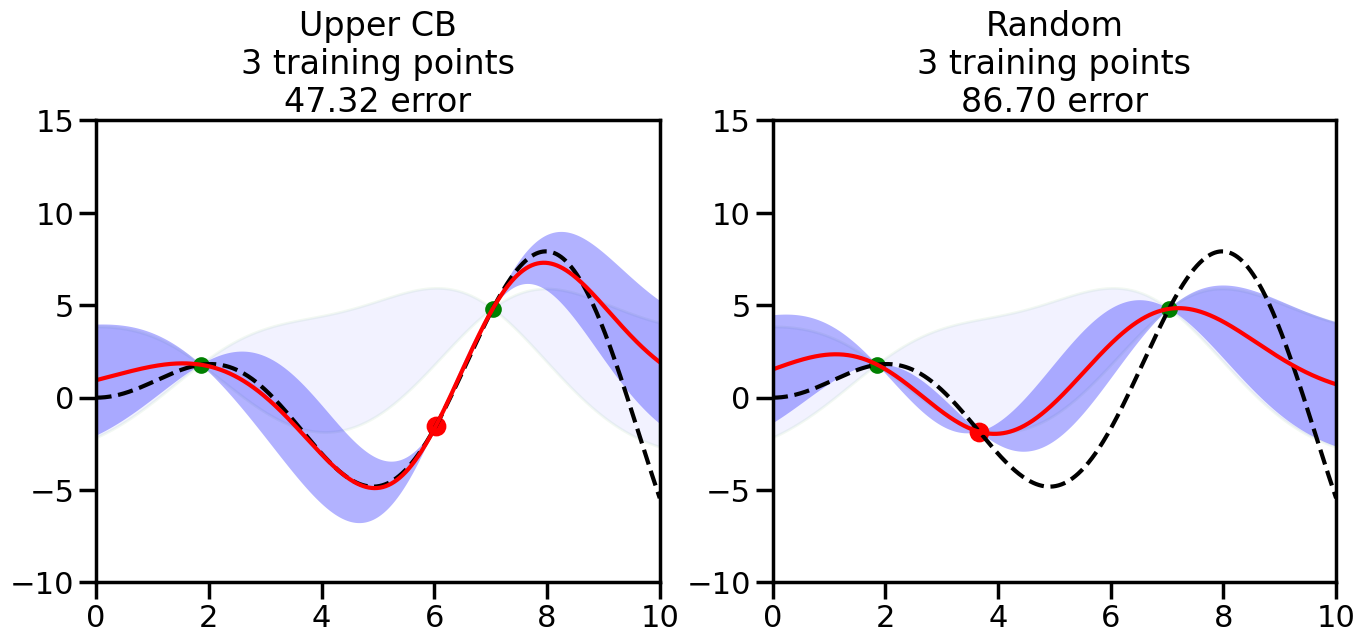

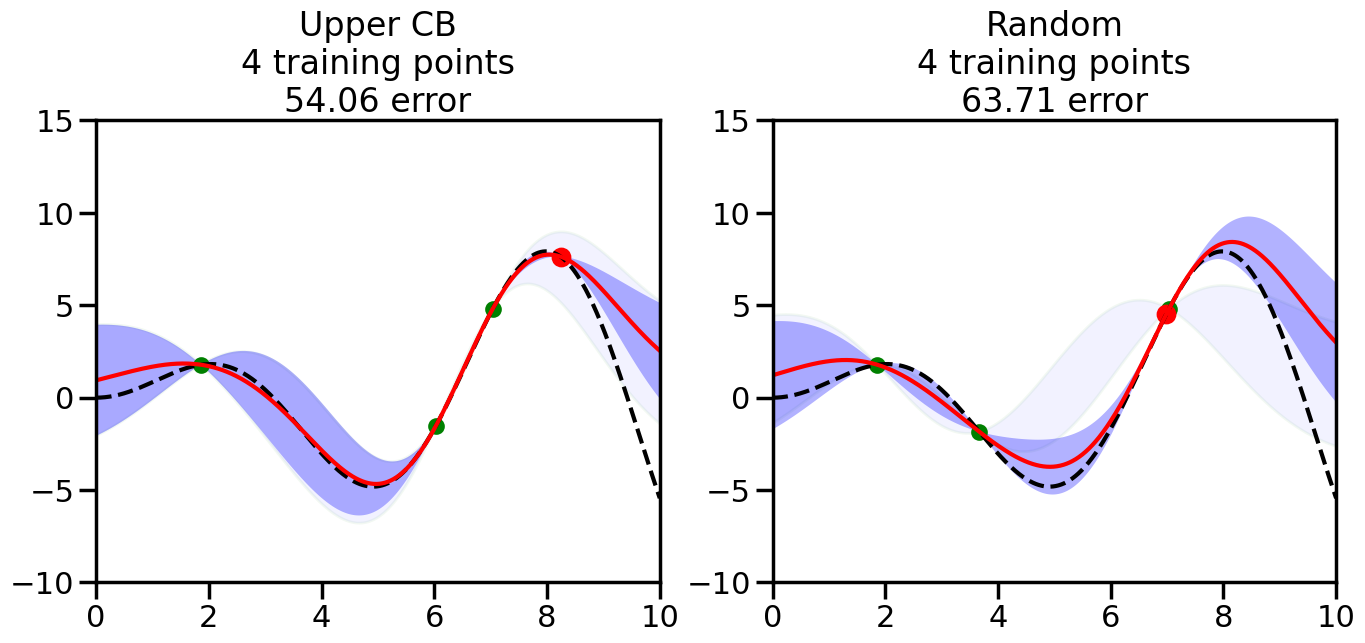

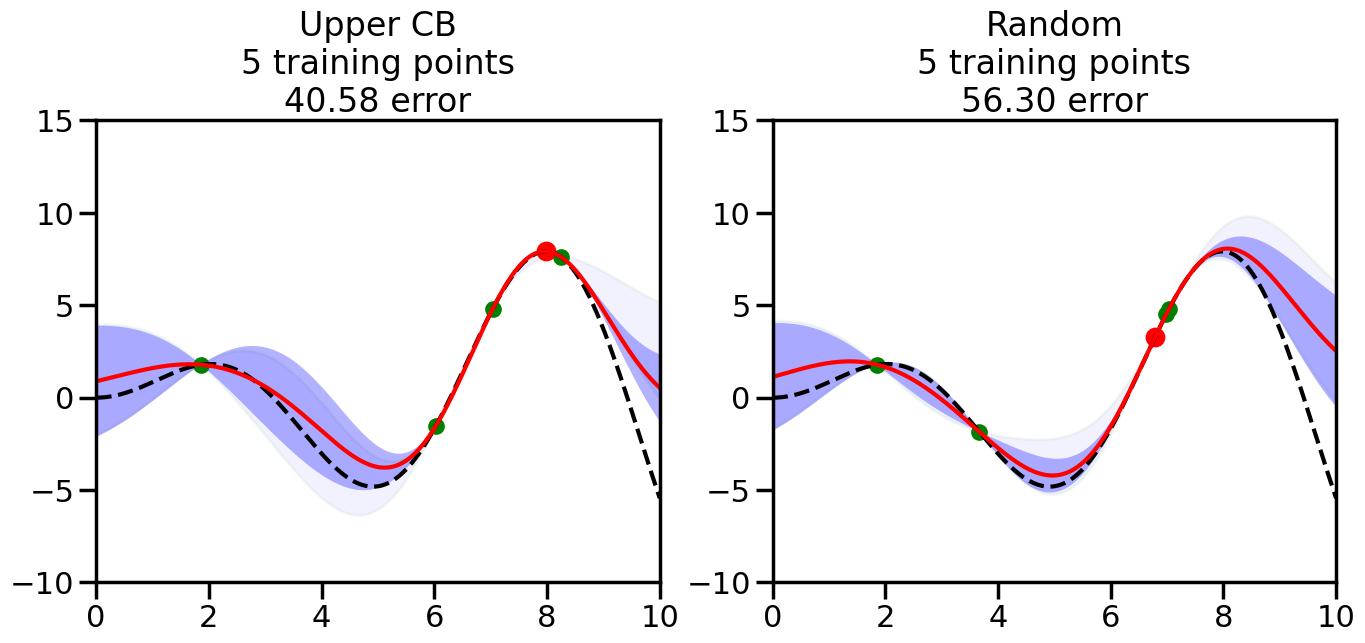

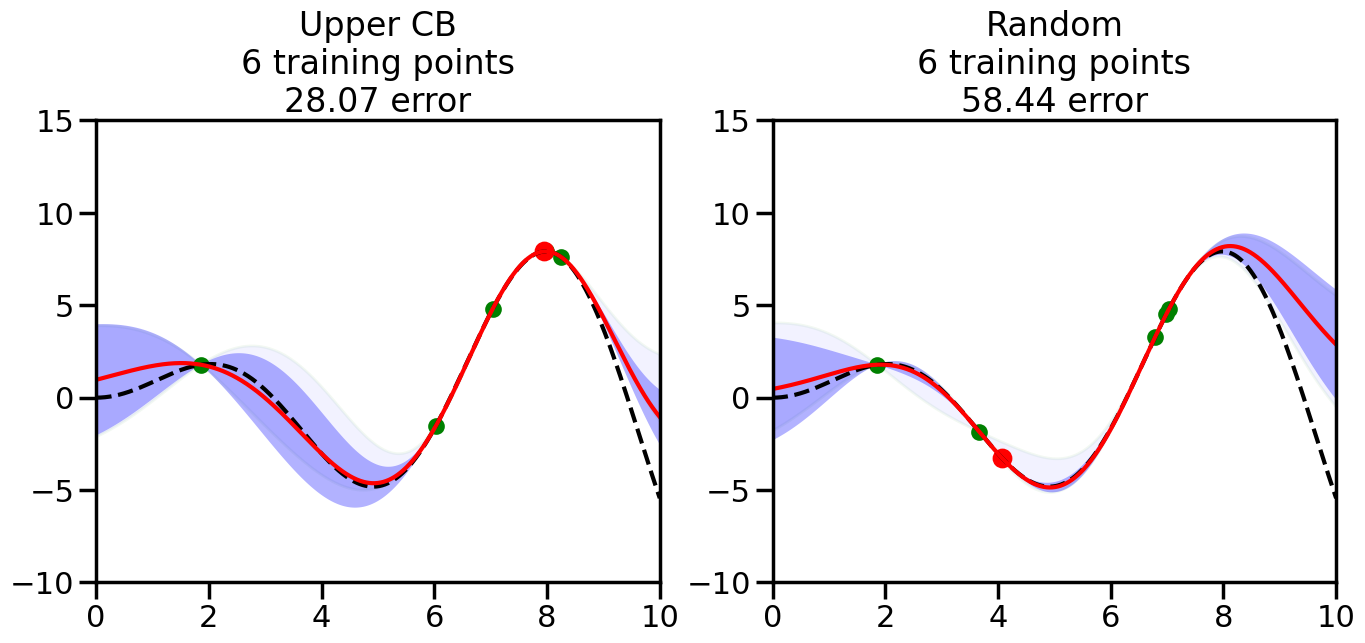

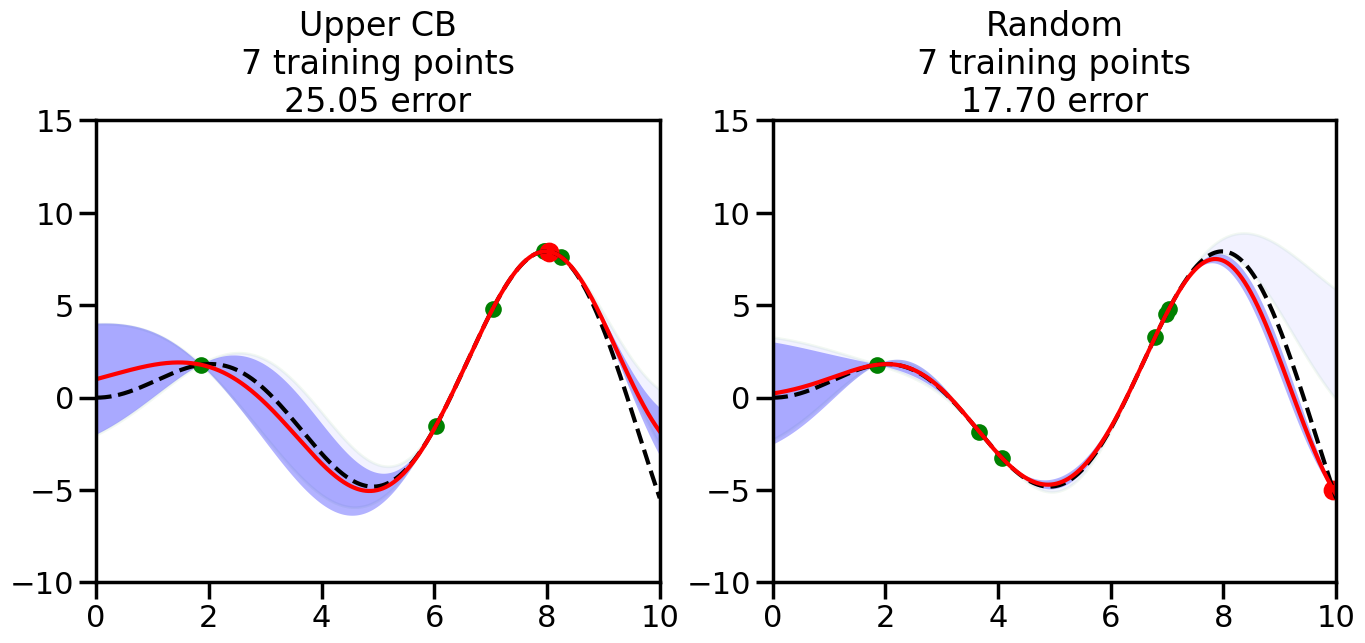

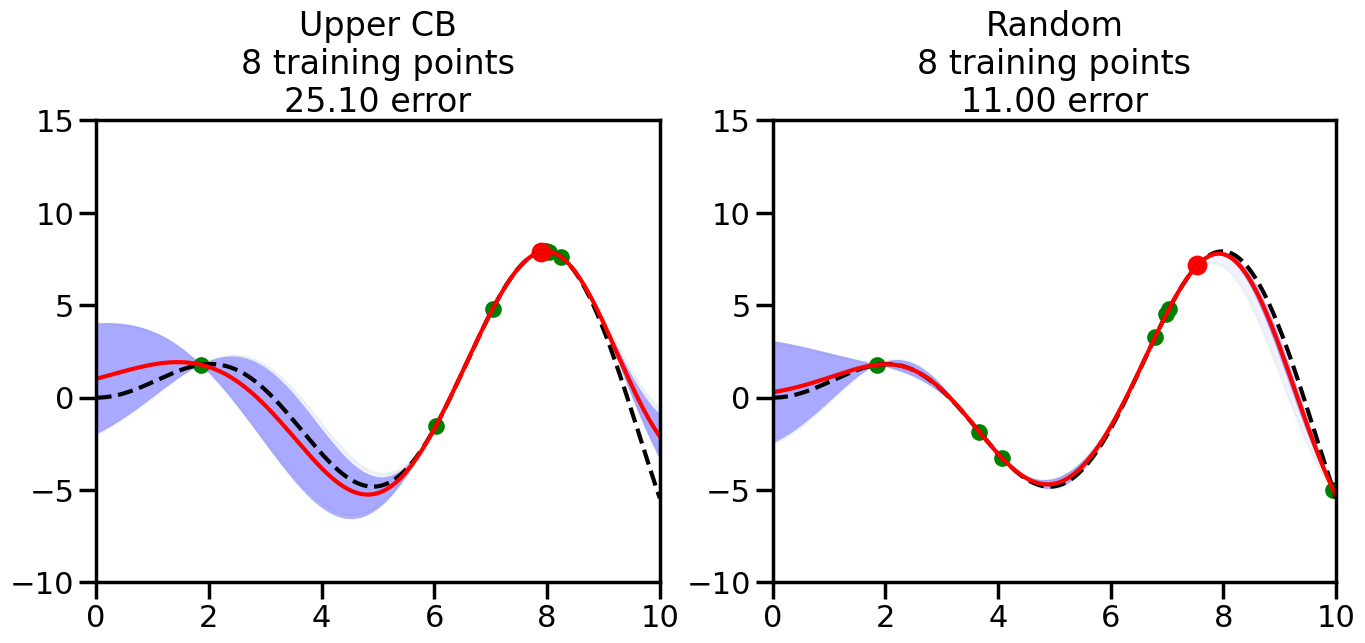

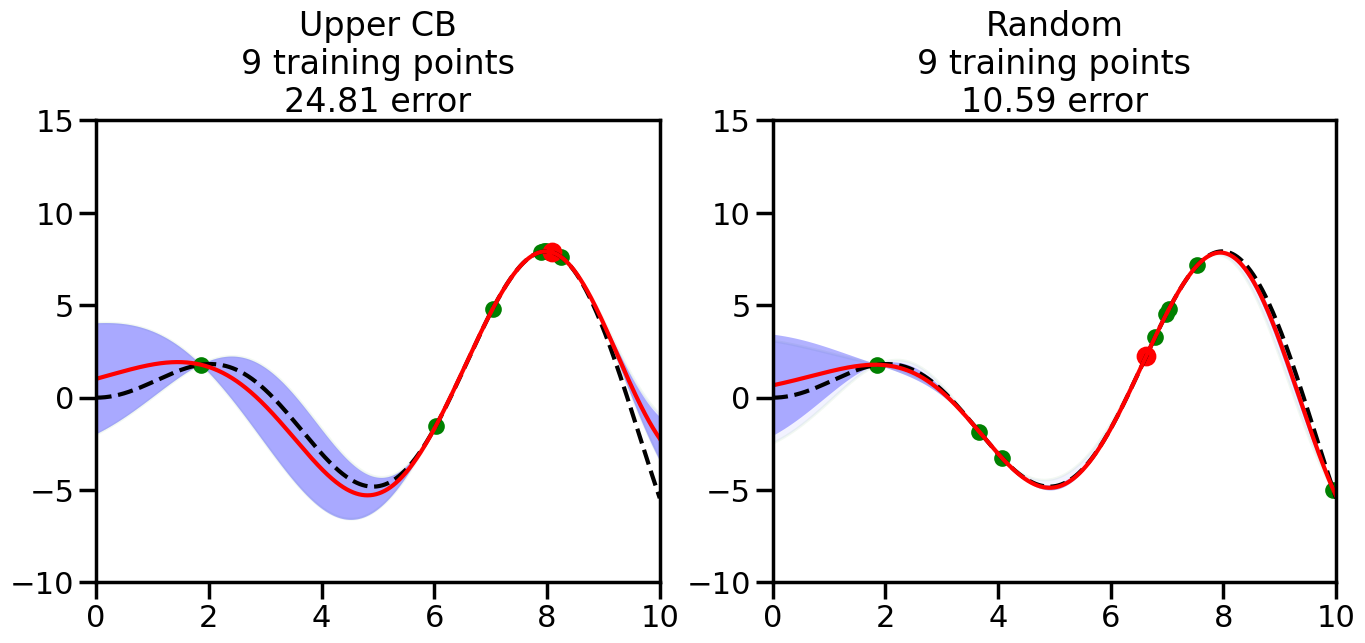

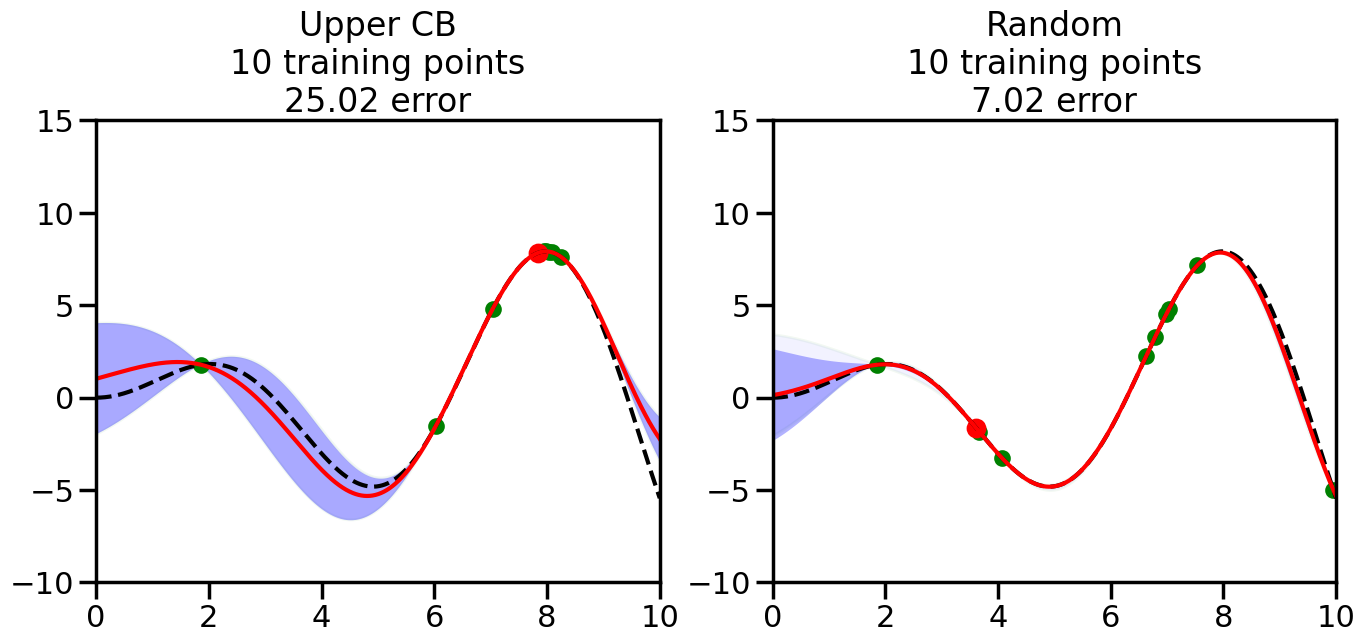

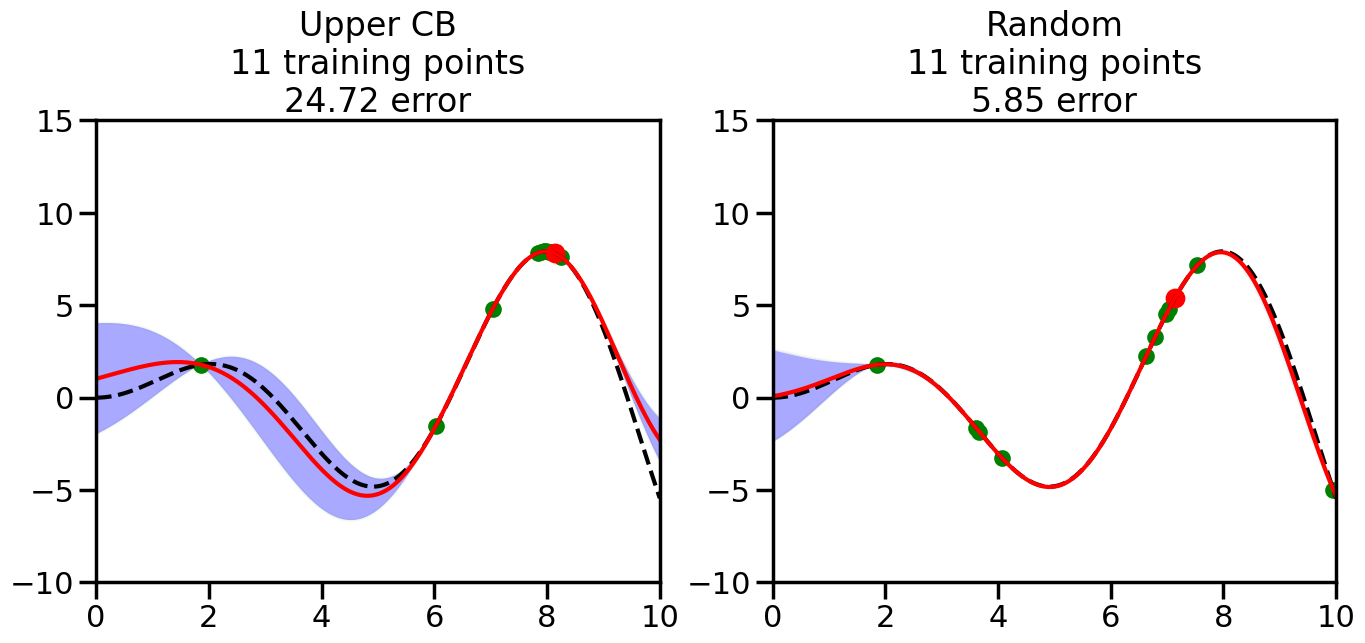

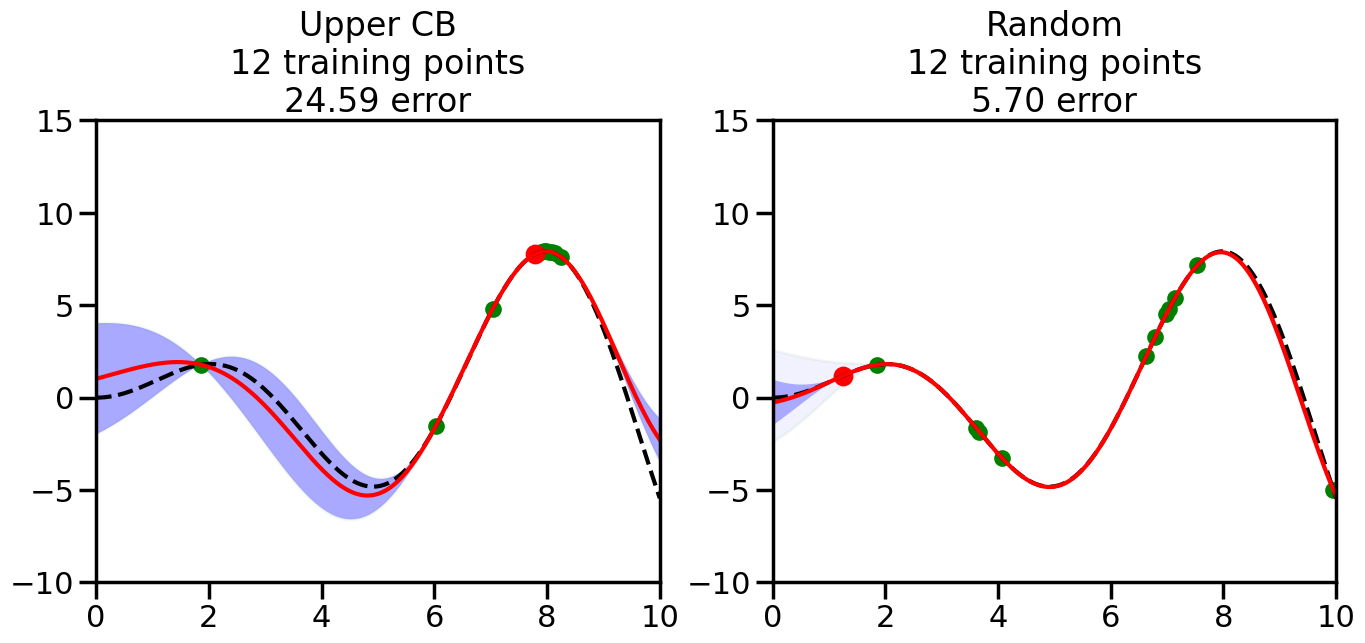

In [36]:
########################################################
# This is just a helper function, no need to worry about
# The internals.
# We will return to this example in Week 14
########################################################
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Create a Gaussian Process model
#kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
#gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
kernel = C(3.0)*RBF(1.5)
gp = GaussianProcessRegressor(kernel=kernel,alpha=1e-6,optimizer=None)
#gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1e-1,random_start=100)

# Now, ready to begin learning:
train_ind ={
    'Upper CB':   np.zeros(len(X),dtype=bool),
    'Random':np.zeros(len(X),dtype=bool)
}
options = train_ind.keys()

possible_points = np.array(list(range(len(X))))
# Possible Initialization options
# 1. Select different points randomly
#for i in range(2):
#    for o in options:
#        ind = np.random.choice(possible_points[~train_ind[o]],1)
#        train_ind[o][ind] = True

# 2. Start with end-points
#for o in options:
#    train_ind[o][0] = True
#    train_ind[o][-1] = True

# 3. Start with same random points
for ind in np.random.choice(possible_points,2):
    for o in options:
        train_ind[o][ind] = True

plot_list = np.array([5,10,20,30,40,50,len(X)])
for i in range(10):
    # As i increases, we increase the number of points
    plt.figure(figsize=(16,6))
    for j,o in enumerate(options):
        plt.subplot(1,2,j+1)
        gp.fit(X[train_ind[o],:],y[train_ind[o]])
        yp,sigma = gp.predict(X[~train_ind[o],:], return_std=True)
        ucb = yp + 1.96*sigma
        if o == 'Upper CB':
            #candidates = np.extract(MSE == np.amax(MSE),X[~train_ind[o],:])
            candidates = np.extract(ucb == np.amax(ucb),X[~train_ind[o],:])
            next_point = np.random.choice(candidates.flatten())
            next_ind = np.argwhere(X.flatten() == next_point)
        elif o == 'Random':
            next_ind = np.random.choice(possible_points[~train_ind[o]],1)
        train_ind[o][next_ind] = True
        
        # Plot intermediate results
        yp,sigma = gp.predict(x, return_std=True)
        plt.fill(np.concatenate([x, x[::-1]]),
                np.concatenate([yp - 1.9600 * sigma,
                               (yp + 1.9600 * sigma)[::-1]]),'b',
                alpha=0.05,  ec='g', label='95% confidence interval')
    
        n_train = np.count_nonzero(train_ind[o])

        gp.fit(X[train_ind[o],:],y[train_ind[o]])
        # Show progress
        yp,sigma = gp.predict(x, return_std=True)
        yt = f(x)
        error = np.linalg.norm(yp-yt.flatten())

        plt.fill(np.concatenate([x, x[::-1]]),
                np.concatenate([yp - 1.9600 * sigma,
                               (yp + 1.9600 * sigma)[::-1]]),'b',
                alpha=0.3,  ec='None', label='95% confidence interval')
        
        plt.plot(x,yt,'k--',alpha=1)
        plt.plot(x,yp,'r-',alpha=1)
        plt.scatter(X[train_ind[o],:],y[train_ind[o]],color='g',s=100)
        plt.scatter(X[next_ind,:].flatten(),y[next_ind].flatten(),color='r',s=150)
        plt.ylim([-10,15])
        plt.xlim([0,10])
        plt.title("%s\n%d training points\n%.2f error"%(o,n_train,error))
    plt.show()

## The Curse of Dimensionality
Discuss on board examples of the Curse of Dimensionality and how it affects algorithms dependent on calculating distances.

* Space-filling properties of inscribed hyper-cube
* Distance ratio between min and max distances
* Effects on nearest neighbor graphs
* Effects on Gaussian Density

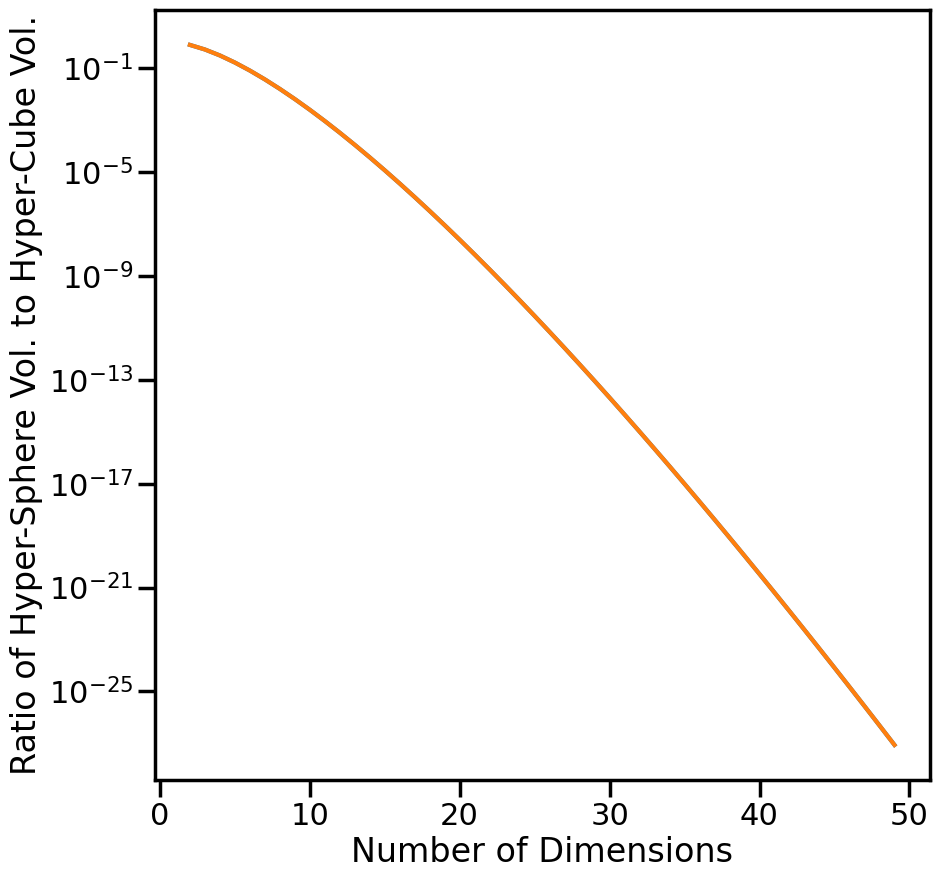

In [37]:
from math import gamma
V_sphere = lambda d: np.pi**(d/2.0)
V_cube = lambda d: d*2**(d-1)*gamma(d/2.0)
volume_ratio = lambda d: V_sphere(d)/V_cube(d)

d = range(2,50)
ratio = [volume_ratio(i) for i in d]
plt.figure(figsize=(10,10))
plt.plot(d,ratio)
plt.semilogy(d,ratio)
plt.ylabel("Ratio of Hyper-Sphere Vol. to Hyper-Cube Vol.")
plt.xlabel("Number of Dimensions")
plt.show()

# TODO: Add distance min/max example